# Multiple Linear Regression

## Importing libraries and the dataset

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import the dataset
df = pd.read_csv("housing.csv")
df.head()
#df.info()

C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Feature Selection

In [ ]:
# Drop the Address field as it's textual and not useful for regression without further processing
df = df.drop('Address', axis=1)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [ ]:
# Feature matrix and target vector
X_feature = df.drop('Price', axis=1)  # We assume 'Price' is the column we want to predict
y_target = df['Price']

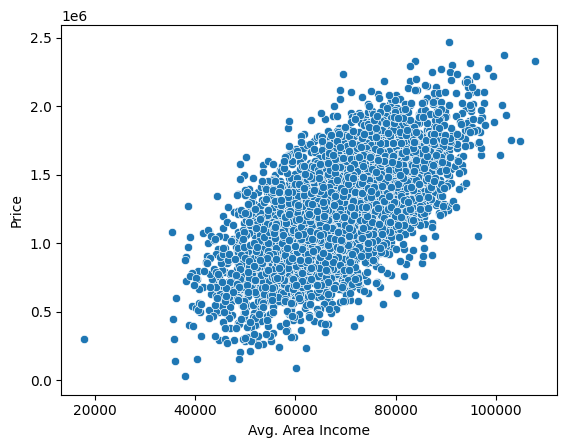

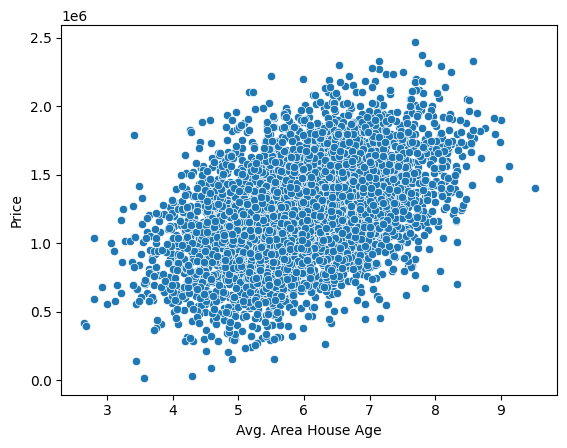

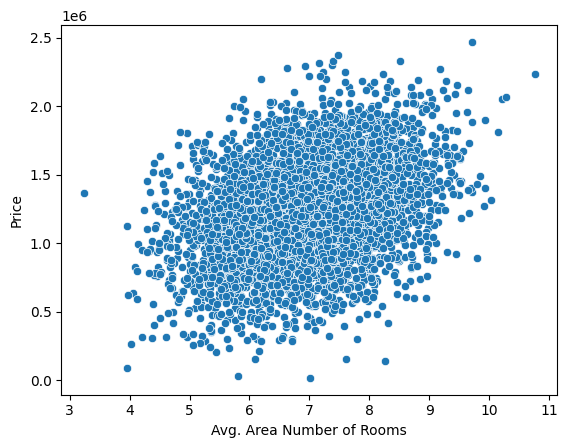

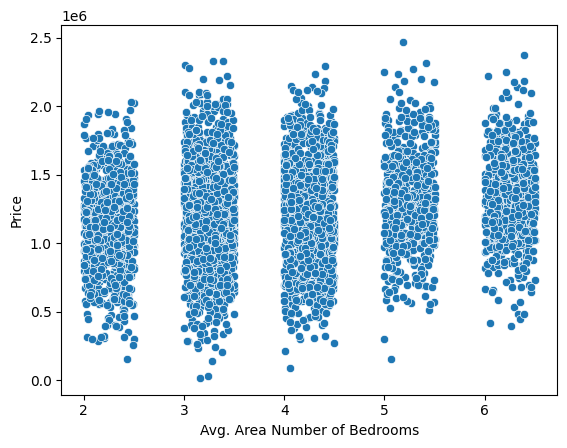

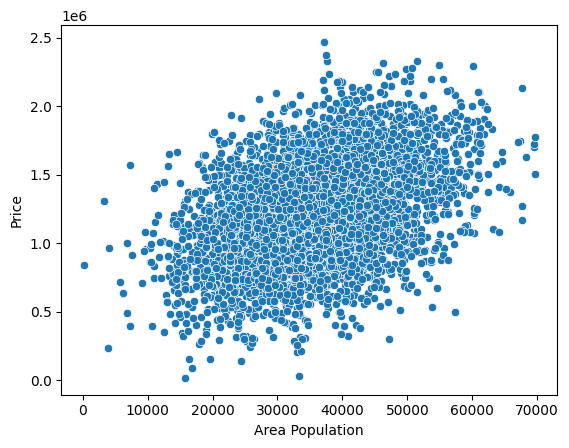

In [ ]:
#Scatterplots to see correlation between Price (target) and features
for col in X_feature.columns:
    sns.scatterplot(data=X_feature, x=X_feature[col], y=y_target)
    plt.show()

<Axes: >

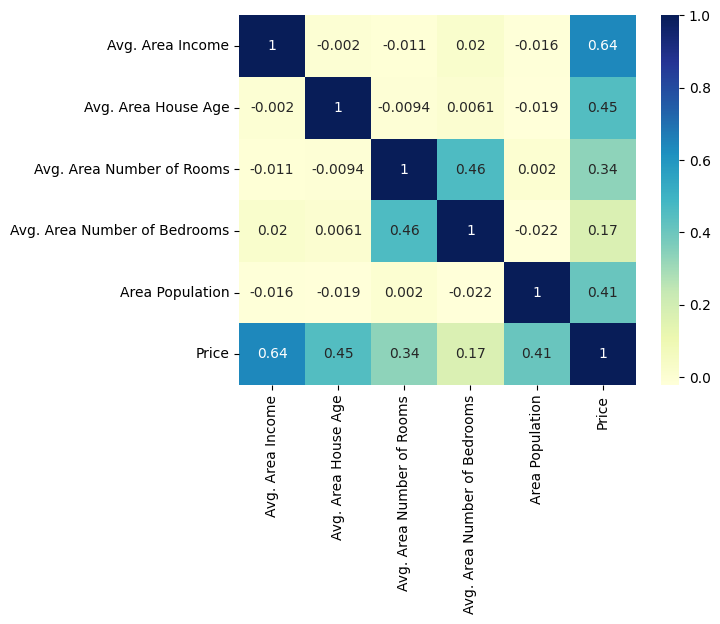

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [ ]:
# Updating Feature matrix by dropping Avg. Area Number of Bedrooms
X_feature = X_feature.drop('Avg. Area Number of Bedrooms', axis=1)

## Implementing Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an empty linear regression model
regr = LinearRegression()

# Create the model using fit(X,y)
regr.fit(X_feature, y_target)

#predict the Price a house where the different features are the average values
averages = [X_feature[cols].mean() for cols in X_feature]
predicted_price = regr.predict([averages])
print('Predicted price for average values: \n', predicted_price)

# Get intercept and coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Predicted price for average values: 
 [1232072.6541453]
Intercept: 
 -2637560.6725508478
Coefficients: 
 [2.15827436e+01 1.65657872e+05 1.21598165e+05 1.51961198e+01]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Training and test samples

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (3500, 4) (3500,)
Test data: (1500, 4) (1500,)


In [ ]:
# Initialize the multiple regression model
multi_reg_model = LinearRegression()

In [ ]:
# Fit the model to the training data
multi_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

## Performance metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 10062092567.349596
R-squared: 0.914735489115077
Mean Absolute Error: 81116.43359989442


Text(0.5, 1.0, 'Residuals of Predictions')

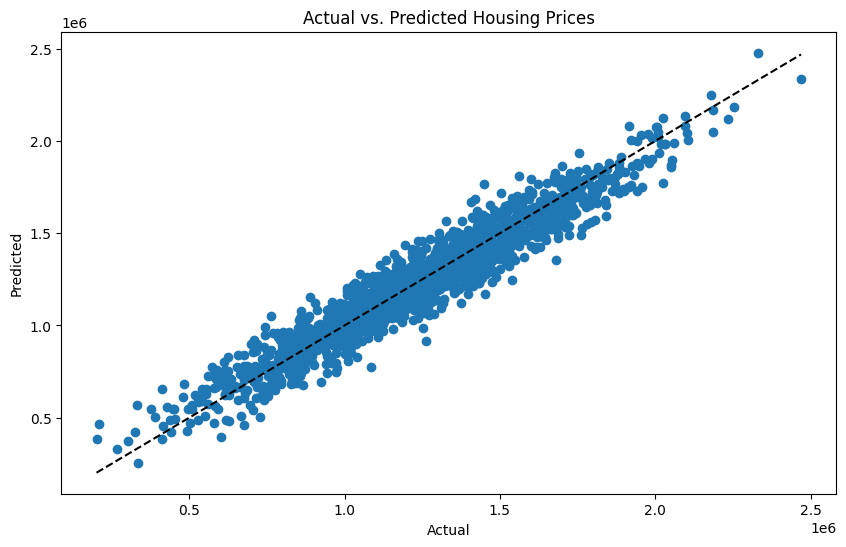

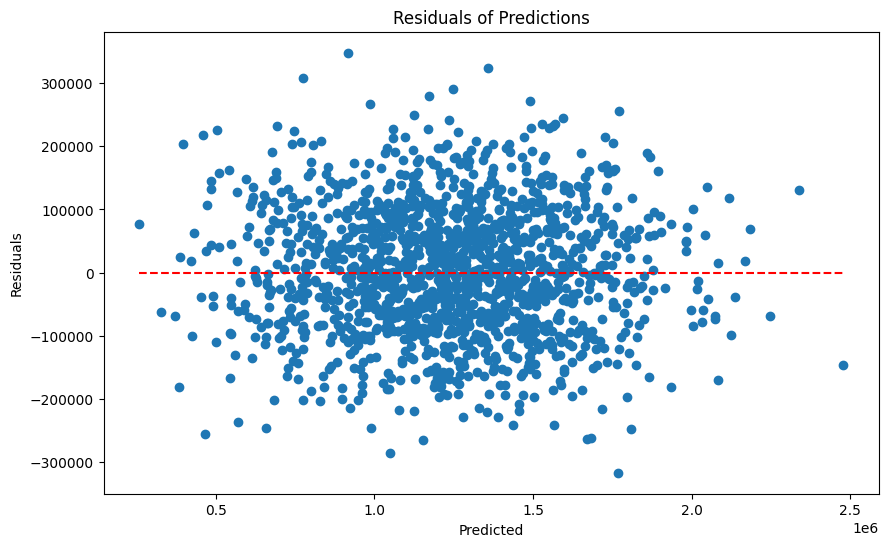

In [ ]:
# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Housing Prices')

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')

### Feature Scaling: Recap

Recall feature scaling is the process of manipulating feature values so that they all fall within a similar range. If you have one feature being anywhere between 0-1000 and another feature being anywhere from 0-0.1, then you have a scaling issue. The first feature would naturally be prioritised, as it contributes the most to error.

Therefore, we want to ensure that all features are on the same scale. This is the process of feature scaling. There are two ways we can scale features: normalisation, or standardisation.

Standardisation is a type of scaling that will shift your values to have a mean of 0 and a standard deviation of 1. This way, most of your features will be between -1 and 1. However, it is possible for some outliers to go a bit higher. Standardisation is a great form of feature scaling, but works best with features that follow a Gaussian (normal) distribution.

Normalisation is simply the process of (a) subtracting the minimum value of the dataset and (b) dividing by the range of the dataset (which is max - min). This ensures that your smallest value is always 0 and your largest value is always 1. This is less optimal than standardisation, but doesn't require your data to be a Gaussian.

With all this in mind, let's take a look at the statistical distribution of our data.

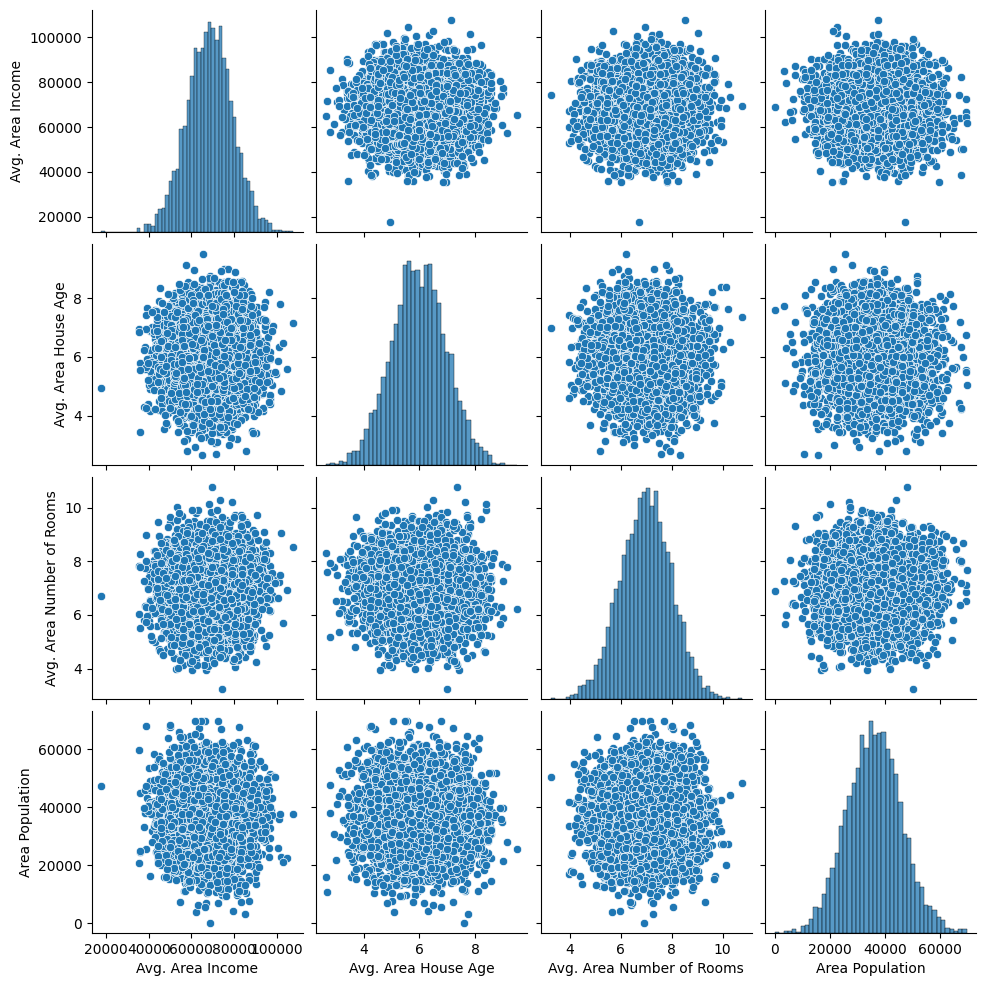

In [ ]:
# Plot the distribution of the data
sns.pairplot(data=df.drop(['Price', 'Avg. Area Number of Bedrooms'], axis=1))

Looks like the features follow a Gaussian distribution. Let's standardise our data using `StandardScaler`. Note that we fit it on the training set; we don't want to fit anything on the test set.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fit the scaler on train data
sc = StandardScaler() #MinMaxScaler() would be used if the data was not Gaussian
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Using a 0.3 test size split our data into a training set and a test set.

We can use this to evaluate our model.


### Fit the model on the training data


In [ ]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 1228219.149247
Coefficients: 
 [232770.04241454 163871.61412487 122459.16634906 151222.83878497]


In [ ]:
# Predictions
predictions

array([1309493.18923746, 1238962.66596317, 1248121.55591473, ...,
       1459381.97707895, 1482240.08195221, 1050989.28897313])

In [ ]:
print(X_test.shape)
print(y_test.shape)

(1500, 4)
(1500,)


(4,)

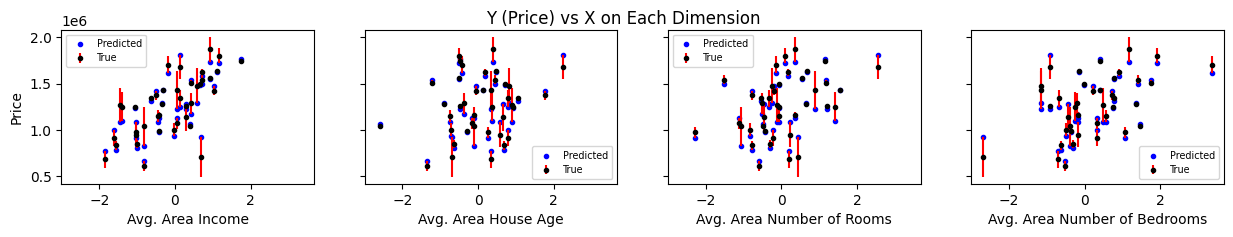

In [ ]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(15,2))
fig.suptitle("Y (Price) vs X on Each Dimension")
ax[0].set_ylabel(df.columns[5])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions))

# Plot data, predicted values, and error bars
#X has shape 1500,4 and Y has 1500 elements
#Plotting only the first 40 values
npoint = 40
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:npoint, i], y_test[:npoint], yerr=error_bar_values[:npoint], fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:npoint,i], predictions[:npoint], c='b', marker='.', label='Predicted')
    ax[i].set_xlabel(df.columns[i])
    ax[i].legend(loc='best', fontsize='x-small')

X_test[50,].shape

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

Sklearn's `LinearRegression` provides the R squared score for its models.

In [ ]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 10062092567.349596
R-squared: 0.914735489115077
Mean Absolute Error: 81116.43359989442


This score is quite close to 1, which suggests that our model fits our observations quite well.

## Normalising the Numerica data

In [ ]:
#Normalizing numeric data
new_df = (df - df.mean()) / df.std()
new_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028557,-0.296897,0.021272,0.088053,-1.317467,-0.490032
1,1.000708,0.025899,-0.255481,-0.722229,0.403959,0.775431
2,-0.684561,-0.112292,1.516092,0.930747,0.072403,-0.490162
3,-0.491450,1.221450,-1.392938,-0.584481,-0.186716,0.080835
4,-0.806992,-0.944739,0.846657,0.201493,-0.988289,-1.702348


## Train test split and Performance Metrics

In [ ]:
# Feature matrix and target vector
X_feature = new_df.drop('Price', axis=1)  # We assume 'Price' is the column we want to predict
y_target = new_df['Price']

# Updating Feature matrix by dropping Avg. Area Number of Bedrooms
X_feature = X_feature.drop('Avg. Area Number of Bedrooms', axis=1)

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

# Initialize the multiple regression model
multi_reg_model = LinearRegression()

# Fit the model to the training data
multi_reg_model.fit(X_train, y_train)

# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.08069553676689764
R-squared: 0.9147354891150797
Mean Absolute Error: 0.22971505100062575
